![title](../static/wcar.png)
#  Pull Down Analysis

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

## Mat and Met
The oocysts were excysted and then filtered (1um membrane ) to separate the sporozoites from the walls. The walls were spun down and then the pellet was solubilized with 4% SDS, 10mM DTT, 1x protease inhibitor cocktail in 100mM TrisHCl (pH7.6). The samples were incubated at 56C for 1 hour and then the soluble protein was passed onto the MS facility.



### Notes
- First batch and Second batch differ in excystation protocol. 
- The second batch added acid tretment. 
- The third batch uses a density gradient of iohexol to separate oocysts out (washed 3 times with PBS)


- First MS run was on 80 min gradients.
- Second MS run was on 120 min gradient.
- Third MS run was on 80 min gradient.

In [1]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/mtinti/Desktop/git_projects/beatrice_wall/notebooks')

In [2]:
#reload library if modified
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../mylib')

In [4]:
import os
from ProteomicsUtility import utilities as PTUT
import pandas as pd
import seaborn as sns
import ProtRank
import matplotlib.pyplot as plt
import numpy as np

## Load and clean dataset
We load the MaxQuant output for:
- the firsth batch (WALL0) 
- the second batch (WALL1-3, SPORO1-3)
- the third batch (WALL4-6, SPORO4-6)

We analise protein/protein groups with a minimum of two unique peptide identified and andromada score > 5.

In [5]:
#df = pd.read_csv('../all_experiment/proteinGroups.txt',sep='\t')
#literature_wall = df[[True if 'Oocyst wall' in str(n) else False for n in df['Fasta headers']]]
#literature_wall

In [6]:
df = pd.read_csv('../all_experiment/proteinGroups.txt',sep='\t')
df = PTUT.clean_df(df, score=5, unique_pep_threshold=2)
df = PTUT.mod_df(df)
print(df.shape)
df.head()

starting from: (2374, 176)
removed  121 Protein Groups by: Only identified by site
tot  121  entries removed
---------------
removed  22 Protein Groups by: Reverse
tot  143  entries removed
---------------
removed  67 Protein Groups by: Potential contaminant
tot  210  entries removed
---------------
removed  260 Protein Groups by: Score
tot  470  entries removed
---------------
removed  45 Protein Groups by: Peptide counts (unique)
tot  515  entries removed
---------------
(1859, 179)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
0,cgd1_1060-RA-p1,cgd1_1060-RA-p1,26,26,26,cgd1_1060-RA-p1 | transcript=cgd1_1060-RA | ge...,1,26,26,26,...,True;True;True;True;True;True;True;True;True;T...,3516;5496;6155;6156;6698;6699;7752;8807;10402;...,58611;58612;58613;89229;89230;89231;89232;8923...,50519;50520;77050;77051;77052;77053;77054;7705...,50519;77059;84125;88746;88750;104072;117906;14...,0;1;2;3;4,361;457;563;567;936,26,cgd1_1060-RA-p1,Uncharacterized protein with Armadillo-type fold
1,cgd1_1080-RA-p1,cgd1_1080-RA-p1,10,10,10,cgd1_1080-RA-p1 | transcript=cgd1_1080-RA | ge...,1,10,10,10,...,True;True;True;True;True;True;True;True;True;True,7363;7916;11499;16125;18964;22502;22503;23596;...,115161;115162;115163;115164;115165;115166;1151...,99038;99039;99040;99041;99042;99043;99044;9904...,99046;106245;153687;212027;246470;291208;30567...,5,1,10,cgd1_1080-RA-p1,Alpha beta hydrolase
2,cgd1_110-RA-p1,cgd1_110-RA-p1,6,6,6,cgd1_110-RA-p1 | transcript=cgd1_110-RA | gene...,1,6,6,6,...,True;True;True;True;True;True,1503;7535;7549;17919;18531;36089,25015;25016;25017;25018;117735;117976;117977;1...,21074;21075;21076;101296;101499;101500;233168;...,21075;101296;101499;233168;240559;474860,NaN,NaN,6,cgd1_110-RA-p1,Signal peptide region containing protein
3,cgd1_1110-RA-p1,cgd1_1110-RA-p1,6,6,6,cgd1_1110-RA-p1 | transcript=cgd1_1110-RA | ge...,1,6,6,6,...,True;True;True;True;True;True,6075;6902;10110;21785;25282;31538,96933;96934;96935;96936;107460;158845;158846;1...,83466;92270;136935;136936;136937;136938;136939...,83466;92270;136940;282669;326645;407453,NaN,NaN,6,cgd1_1110-RA-p1,Phosphatidyl serine synthase
4,cgd1_1140-RA-p1,cgd1_1140-RA-p1,14,14,14,cgd1_1140-RA-p1 | transcript=cgd1_1140-RA | ge...,1,14,14,14,...,True;True;True;True;True;True;True;True;True;T...,3734;10914;11097;15944;16507;20956;20957;23013...,61602;61603;171107;171108;171109;171110;171111...,53069;53070;147276;147277;147278;147279;147280...,53069;147279;149939;210543;216148;271996;27200...,6,73,14,cgd1_1140-RA-p1,Acyl-CoA-binding protein ACBP with Ankyrin repeat


In [7]:
df[[False if 'tr|' in n else True for n in df['Fasta headers']]]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
0,cgd1_1060-RA-p1,cgd1_1060-RA-p1,26,26,26,cgd1_1060-RA-p1 | transcript=cgd1_1060-RA | ge...,1,26,26,26,...,True;True;True;True;True;True;True;True;True;T...,3516;5496;6155;6156;6698;6699;7752;8807;10402;...,58611;58612;58613;89229;89230;89231;89232;8923...,50519;50520;77050;77051;77052;77053;77054;7705...,50519;77059;84125;88746;88750;104072;117906;14...,0;1;2;3;4,361;457;563;567;936,26,cgd1_1060-RA-p1,Uncharacterized protein with Armadillo-type fold
1,cgd1_1080-RA-p1,cgd1_1080-RA-p1,10,10,10,cgd1_1080-RA-p1 | transcript=cgd1_1080-RA | ge...,1,10,10,10,...,True;True;True;True;True;True;True;True;True;True,7363;7916;11499;16125;18964;22502;22503;23596;...,115161;115162;115163;115164;115165;115166;1151...,99038;99039;99040;99041;99042;99043;99044;9904...,99046;106245;153687;212027;246470;291208;30567...,5,1,10,cgd1_1080-RA-p1,Alpha beta hydrolase
2,cgd1_110-RA-p1,cgd1_110-RA-p1,6,6,6,cgd1_110-RA-p1 | transcript=cgd1_110-RA | gene...,1,6,6,6,...,True;True;True;True;True;True,1503;7535;7549;17919;18531;36089,25015;25016;25017;25018;117735;117976;117977;1...,21074;21075;21076;101296;101499;101500;233168;...,21075;101296;101499;233168;240559;474860,NaN,NaN,6,cgd1_110-RA-p1,Signal peptide region containing protein
3,cgd1_1110-RA-p1,cgd1_1110-RA-p1,6,6,6,cgd1_1110-RA-p1 | transcript=cgd1_1110-RA | ge...,1,6,6,6,...,True;True;True;True;True;True,6075;6902;10110;21785;25282;31538,96933;96934;96935;96936;107460;158845;158846;1...,83466;92270;136935;136936;136937;136938;136939...,83466;92270;136940;282669;326645;407453,NaN,NaN,6,cgd1_1110-RA-p1,Phosphatidyl serine synthase
4,cgd1_1140-RA-p1,cgd1_1140-RA-p1,14,14,14,cgd1_1140-RA-p1 | transcript=cgd1_1140-RA | ge...,1,14,14,14,...,True;True;True;True;True;True;True;True;True;T...,3734;10914;11097;15944;16507;20956;20957;23013...,61602;61603;171107;171108;171109;171110;171111...,53069;53070;147276;147277;147278;147279;147280...,53069;147279;149939;210543;216148;271996;27200...,6,73,14,cgd1_1140-RA-p1,Acyl-CoA-binding protein ACBP with Ankyrin repeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,cgd8_840-RA-p1,cgd8_840-RA-p1,26,24,23,cgd8_840-RA-p1 | transcript=cgd8_840-RA | gene...,1,26,24,23,...,True;True;True;True;True;True;True;True;True;T...,408;1191;1276;1277;1278;3106;3107;4443;5503;68...,6289;6290;6291;6292;6293;6294;6295;6296;6297;6...,5246;5247;5248;5249;5250;5251;5252;5253;5254;5...,5258;16729;18082;44880;44883;62280;77127;91210...,5152;5153;5154;5155;5156;5157;5158;5159;5160;5...,110;120;124;189;193;198;234;279;345;354;382,23,cgd8_840-RA-p1,26S proteasome subunit P45/AAA+ ATpase
1920,cgd8_860-RA-p1,cgd8_860-RA-p1,56,56,56,cgd8_860-RA-p1 | transcript=cgd8_860-RA | gene...,1,56,56,56,...,True;True;True;True;True;True;True;True;True;T...,1651;1715;2069;2477;3596;3597;5863;6293;7022;7...,27909;27910;27911;27912;27913;27914;27915;2791...,23622;23623;23624;23625;23626;23627;23628;2362...,23634;24274;29388;35508;51236;51257;80903;8513...,5163;5164;5165;5166,340;862;937;1050,56,cgd8_860-RA-p1,Coatomer protein complex subunit alpha
1921,cgd8_880-RA-p1,cgd8_880-RA-p1,10,10,10,cgd8_880-RA-p1 | transcript=cgd8_880-RA | gene...,1,10,10,10,...,True;True;True;True;True;True;True;True;True;True,5906;5918;6892;14438;21142;27028;28288;28514;3...,94319;94320;94321;94538;94539;107251;222455;32...,81258;81259;81422;81423;92103;191720;274822;34...,81258;81423;92103;191720;274822;349713;365436;...,5167,349,10,cgd8_880-RA-p1,Transcription initiation factor TFIIB Sua7p Zn...
1922,cgd8_890-RA-p1,cgd8_890-RA-p1,6,6,6,cgd8_890-RA-p1 | transcript=cgd8_890-RA | gene...,1,6,6,6,...,True;True;True;True;True;True,11359;13604;31683;33

In [8]:
print(df.shape)
print('Removing protein with high homology to Cow proteins')
df = df[[False if 'tr|' in n else True for n in df['Fasta headers']]]
print(df.shape)

(1859, 179)
Removing protein with high homology to Cow proteins
(1733, 179)


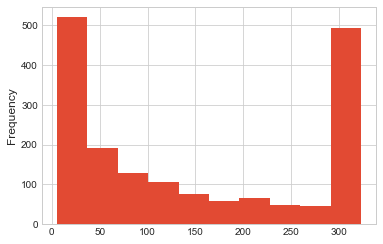

In [9]:
df['Score'].plot(kind='hist')

In [10]:
df[df['Gene_id']=='cgd4_3090-RA-p1']

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
735,cgd4_3090-RA-p1,cgd4_3090-RA-p1,27,27,27,cgd4_3090-RA-p1 | transcript=cgd4_3090-RA | ge...,1,27,27,27,...,True;True;True;True;True;True;True;True;True;T...,2246;2336;2456;2466;2571;2572;3279;3280;4922;7...,38004;38005;39411;39412;39413;39414;39415;3941...,32215;32216;33619;33620;33621;33622;33623;3362...,32216;33644;35131;35179;37247;47261;47286;6972...,1800;1801;1802;1803;1804;1805;1806,141;286;340;341;360;458;486,27,cgd4_3090-RA-p1,Oocyst wall protein 6


## Extract Intensity Values
Let's have a look at the intensity values

In [11]:
#color palette
palette=['b','b','b','r','r','r',
         'b','b','b','r','r','r',
         'y']
palette_g = ['r','b','y']
color_dictionary = { 'b':'SPORO','r':'WALL','y':'Pilot'}

In [12]:
#list(df.columns)

In [13]:
#tag ='Intensity'
tag ='iBAQ'
#tag ='LFQ intensity'
cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL1', ' WALL2',' WALL3',
      ' SPORO4',' SPORO5',' SPORO6', ' WALL4', ' WALL5',' WALL6',
      ' WALL0',]
cols = [tag+n for n in cols]
selection = df[cols]
selection.columns = [n.split(' ')[-1] for n in cols]
print(selection.shape)
selection = selection[(selection.T != 0).any()]
print(selection.shape)

#selection.rename({'PULL':'POOL'},axis=1,inplace=True)
#selection.describe()

(1733, 13)
(1733, 13)


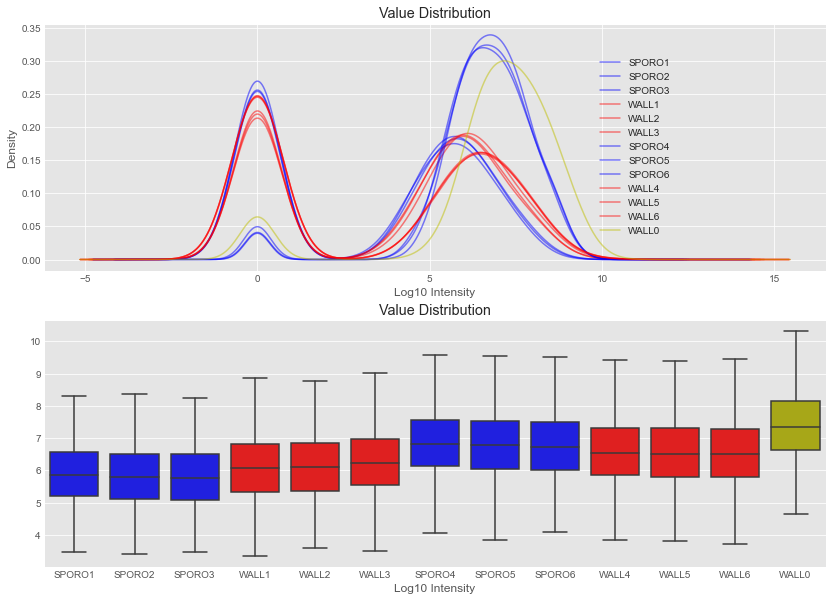

In [14]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=1,nrows=2,figsize=(14,10))

np.log10(selection+1).plot(kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join('../value_distribution.png'))
plt.show()

### Notes
The intesity values of the first run are on average 2 log lower than pilot
The intesity values of the second run are on average 1 log lower than pilot

## Missing Data Analysis
### firsth and second batch

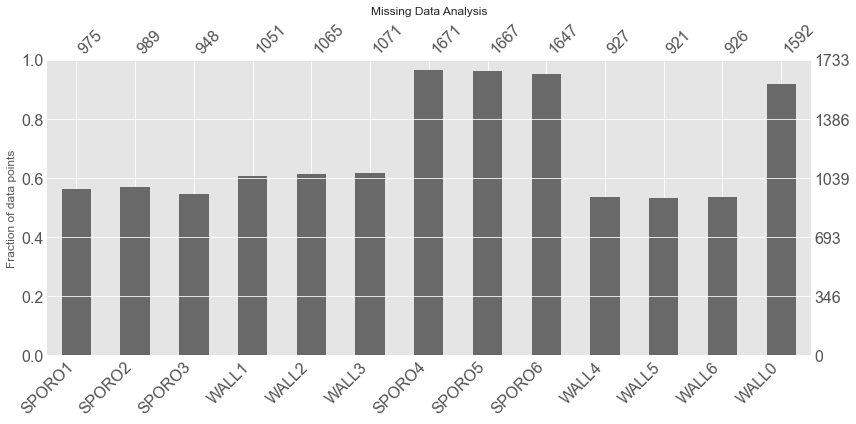

In [15]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(12, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.savefig('missing.png')
plt.show()

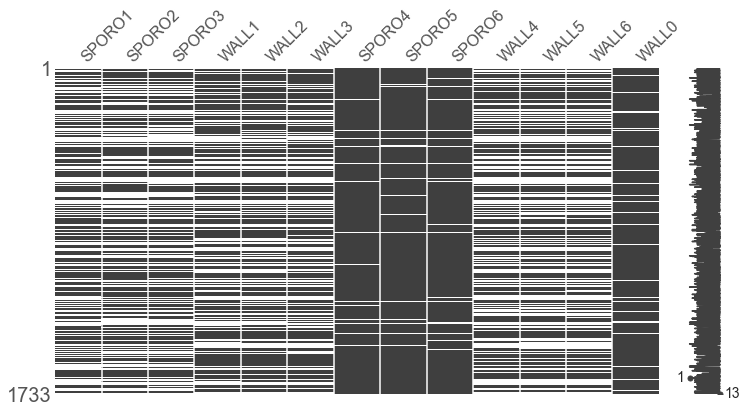

In [16]:
#print(data.shape)
msno.matrix(selection.replace(0,np.nan), figsize=(12, 6))
plt.show()

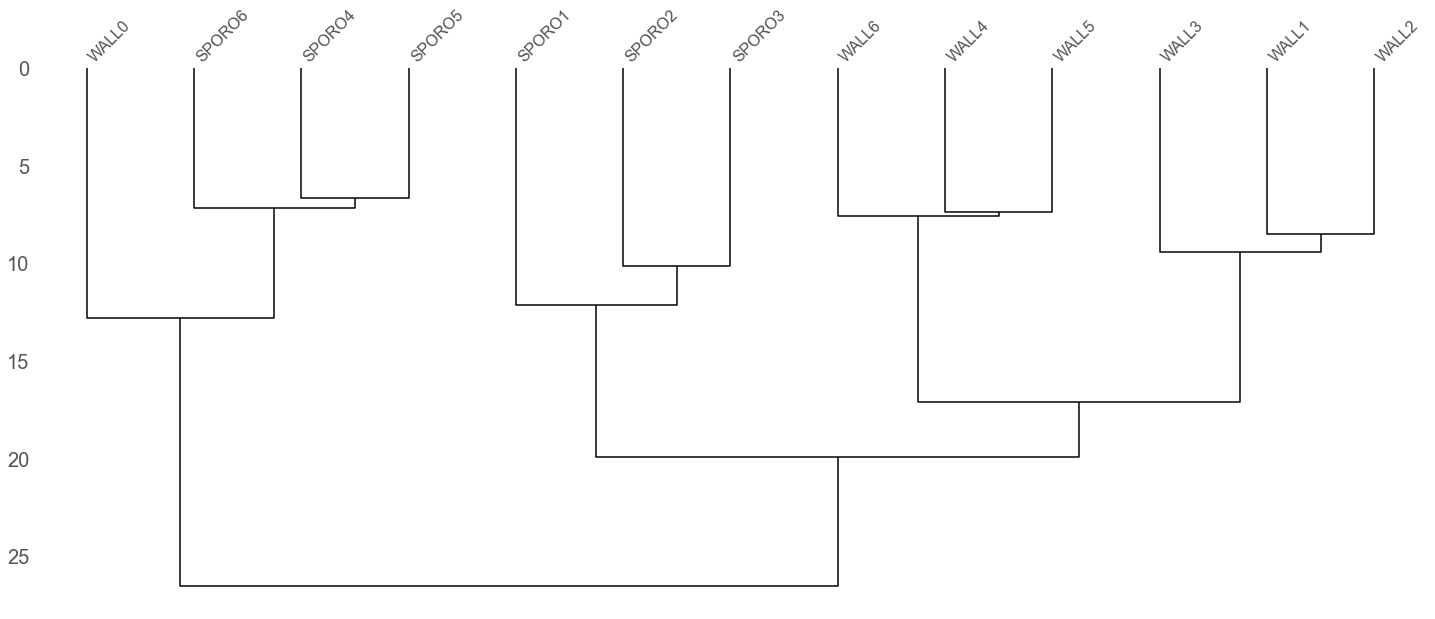

In [17]:
msno.dendrogram(selection.replace(0,np.nan))
plt.show()

### Notes
the first batch identified most of the proteins

In [18]:
#.head()

In [19]:
sporo_nan_1 = selection[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna().sum(axis=1)
wall_nan_1  = selection[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna().sum(axis=1)
only_wall_1 = selection[(sporo_nan_1==3) & (wall_nan_1<3)]
only_sporo_1 = selection[(sporo_nan_1<3) & (wall_nan_1==3)]
print(' Found only in Wall:',only_wall_1.shape[0],'\n',
      'Found only in Sporo:',only_sporo_1.shape[0])

 Found only in Wall: 232 
 Found only in Sporo: 177


In [20]:
np.log1p(only_wall_1).join(df[['Protein IDs','desc']])

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6,WALL0,Protein IDs,desc
5,0.0,0.0,0.0,0.000000,12.466824,12.476676,16.031622,16.367219,16.653419,17.324246,17.203488,17.196505,16.004177,cgd1_1160-RA-p1,Signal peptide region containing protein
15,0.0,0.0,0.0,9.926129,11.739272,11.982873,16.937303,16.649782,16.507228,0.000000,0.000000,0.000000,16.448909,cgd1_130-RA-p1,Signal peptide region containing protein
16,0.0,0.0,0.0,11.992886,12.111163,12.285674,14.324555,14.757352,12.239222,0.000000,0.000000,0.000000,15.982562,cgd1_1310-RA-p1,Cleavage stimulation factor with RNA recogniti...
26,0.0,0.0,0.0,0.000000,0.000000,12.468518,15.152379,14.681392,15.186818,0.000000,0.000000,0.000000,16.634327,cgd1_1500-RA-p1,Uncharacterized protein
41,0.0,0.0,0.0,13.829612,13.564007,13.890062,15.715512,15.632174,14.907367,0.000000,0.000000,0.000000,0.000000,cgd1_1830-RA-p1,TB2/DP1/HVA22 family integral membrane protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0.0,0.0,0.0,15.617270,15.902089,16.387588,17.392257,17.062702,17.031342,0.000000,0.000000,0.000000,17.885426,cgd8_5160-RA-p1,Uncharacterized protein
1894,0.0,0.0,0.0,12.398101,12.193448,0.000000,15.657472,15.197722,15.319499,0.000000,0.000000,0.000000,14.234090,cgd8_5340-RA-p1;REV__tr|F1MJM1|F1MJM1_BOVIN,Uncharacterized Secreted Protein
1899,0.0,0.0,0.0,12.135119,11.484619,12.065551,13.897829,13.677490,14.333471,0.000000,0.000000,0.000000,14.790523,cgd8_5420-RA-p1,Uncharacterized protein
1904,0.0,0.0,0.0,13.345236,11.953893,12.444778,15.230247,14.759689,13.380737,15.557555,15.634691,15.448099,0.000000,cgd8_60-RA-p1,Uncharacterized Protein


In [21]:
sporo_nan_2 = selection[['SPORO4','SPORO5','SPORO6']].replace(0,np.nan).isna().sum(axis=1)
wall_nan_2  = selection[['WALL4','WALL5','WALL6']].replace(0,np.nan).isna().sum(axis=1)
only_wall_2 = selection[(sporo_nan_2==3) & (wall_nan_2<3)]
only_sporo_2 = selection[(sporo_nan_2<3) & (wall_nan_2==3)]
print(' Found only in Wall:',only_wall_2.shape[0],'\n',
      'Found only in Sporo:',only_sporo_2.shape[0])

 Found only in Wall: 22 
 Found only in Sporo: 753


In [22]:
only_wall_2.join(df[['Protein IDs', 'desc']])

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6,WALL0,Protein IDs,desc
143,0.0,0.0,0.0,13473.0,0.0,55590.0,0.0,0.0,0.0,2490700.0,2054100.0,2497400.0,0.0,cgd1_3820-RA-p1,Uncharacterized protein
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1589900.0,2097500.0,2400300.0,0.0,cgd2_3130-RA-p1,Uncharacterized protein
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42731.0,124690.0,103310.0,0.0,cgd2_3500-RA-p1,Uncharacterized protein
369,0.0,0.0,0.0,22179.0,0.0,28603.0,0.0,0.0,0.0,578380.0,520360.0,173120.0,0.0,cgd2_4350-RA-p1,Patched family protein
458,0.0,0.0,0.0,0.0,0.0,9215.3,0.0,0.0,0.0,17866.0,156720.0,143020.0,0.0,cgd3_1830-RA-p1,Uncharacterized protein
481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2506400.0,2669800.0,1874800.0,3697800.0,cgd3_2130-RA-p1,Uncharacterized protein
699,0.0,0.0,0.0,75781.0,93484.0,255490.0,0.0,0.0,0.0,940330.0,1197600.0,1148500.0,0.0,cgd4_2470-RA-p1,Uncharacterized protein
796,0.0,0.0,0.0,40160.0,0.0,32431.0,0.0,0.0,0.0,3139600.0,3168600.0,3966900.0,1857800.0,cgd4_4160-RA-p1,Uncharacterized protein
949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1659700.0,0.0,1120100.0,0.0,cgd5_2820-RA-p1,Uncharacterized protein
972,0.0,0.0,0.0,259530.0,599720.0,861960.0,0.0,0.0,0.0,1980400.0,1888700.0,4061300.0,2643000.0,cgd5_3243-RA-p1,Uncharacterized protein


In [23]:
np.log1p(selection[(sporo_nan_2==3) & 
          (wall_nan_2<3) & 
          (sporo_nan_1==3) & 
          (wall_nan_1<3)]).join(df[['Protein IDs','desc']])

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6,WALL0,Protein IDs,desc
143,0.0,0.0,0.0,9.508517,0.000000,10.925777,0.0,0.0,0.0,14.728075,14.535349,14.730761,0.000000,cgd1_3820-RA-p1,Uncharacterized protein
369,0.0,0.0,0.0,10.006946,0.000000,10.261302,0.0,0.0,0.0,13.267988,13.162278,12.061746,0.000000,cgd2_4350-RA-p1,Patched family protein
458,0.0,0.0,0.0,0.000000,0.000000,9.128729,0.0,0.0,0.0,9.790711,11.962222,11.870747,0.000000,cgd3_1830-RA-p1,Uncharacterized protein
699,0.0,0.0,0.0,11.235616,11.445556,12.450942,0.0,0.0,0.0,13.753987,13.995831,13.953968,0.000000,cgd4_2470-RA-p1,Uncharacterized protein
796,0.0,0.0,0.0,10.600652,0.000000,10.386901,0.0,0.0,0.0,14.959606,14.968801,15.193496,14.434904,cgd4_4160-RA-p1,Uncharacterized protein
972,0.0,0.0,0.0,12.466631,13.304220,13.666965,0.0,0.0,0.0,14.498810,14.451400,15.217014,14.787426,cgd5_3243-RA-p1,Uncharacterized protein
1031,0.0,0.0,0.0,12.303431,12.982391,13.229334,0.0,0.0,0.0,16.729870,16.750059,16.833200,0.000000,cgd5_4530-RA-p1,Uncharacterized protein
1052,0.0,0.0,0.0,10.171031,0.000000,11.427477,0.0,0.0,0.0,14.614998,14.889284,14.601875,0.000000,cgd5_790-RA-p1,Glycosyltransferase family 92
1221,0.0,0.0,0.0,11.787682,11.940680,12.253438,0.0,0.0,0.0,14.376669,14.292056,14.394593,0.000000,cgd6_3730-RA-p1,"Signal peptide, Peptidase S8/S53 domain contai..."
1377,0.0,0.0,0.0,11.675138,0.000000,12.060879,0.0,0.0,0.0,16.128739,15.668616,15.438181,0.000000,cgd7_1350-RA-p1,Uncharacterized protein


In [24]:
df.shape,selection.shape

((1733, 179), (1733, 13))

In [25]:
literature_wall = selection[[True if 'Oocyst wall' in n else False for n in df['Fasta headers']]]
np.log1p(literature_wall)

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6,WALL0
735,0.000000,0.000000,9.783803,17.991834,18.812993,18.314698,16.984986,16.921800,16.967648,19.314194,19.205632,19.324656,19.057258
816,0.000000,0.000000,0.000000,15.261276,15.877081,15.769403,15.390378,15.015686,14.959734,17.634541,17.633531,17.707372,16.735010
824,0.000000,0.000000,0.000000,17.808892,17.978759,18.390088,17.243642,17.115007,17.265784,19.834055,19.931756,19.946085,19.173370
1119,14.192302,13.480668,13.173876,21.550376,21.782860,21.921361,20.155517,19.989463,20.010120,22.456919,22.542235,22.540254,21.381770
1126,0.000000,0.000000,0.000000,13.761214,14.042009,14.676247,12.977271,10.879047,11.314913,16.425139,16.408674,16.474301,14.566786
1783,0.000000,0.000000,0.000000,17.690164,17.718917,18.121169,17.308983,17.300712,17.237980,19.451656,19.495547,19.339169,18.036914


In [26]:
literature_wall = selection[[True if 'Oocyst wall' in n else False for n in df['Fasta headers']]]
np.log1p(literature_wall).join(df[['Protein IDs','desc']])

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6,WALL0,Protein IDs,desc
735,0.000000,0.000000,9.783803,17.991834,18.812993,18.314698,16.984986,16.921800,16.967648,19.314194,19.205632,19.324656,19.057258,cgd4_3090-RA-p1,Oocyst wall protein 6
816,0.000000,0.000000,0.000000,15.261276,15.877081,15.769403,15.390378,15.015686,14.959734,17.634541,17.633531,17.707372,16.735010,cgd4_500-RA-p1,Oocyst wall protein 7
824,0.000000,0.000000,0.000000,17.808892,17.978759,18.390088,17.243642,17.115007,17.265784,19.834055,19.931756,19.946085,19.173370,cgd4_670-RA-p1,Oocyst wall protein 3
1119,14.192302,13.480668,13.173876,21.550376,21.782860,21.921361,20.155517,19.989463,20.010120,22.456919,22.542235,22.540254,21.381770,cgd6_200-RA-p1,Oocyst wall protein 8
1126,0.000000,0.000000,0.000000,13.761214,14.042009,14.676247,12.977271,10.879047,11.314913,16.425139,16.408674,16.474301,14.566786,cgd6_210-RA-p1,Oocyst wall protein 9
1783,0.000000,0.000000,0.000000,17.690164,17.718917,18.121169,17.308983,17.300712,17.237980,19.451656,19.495547,19.339169,18.036914,cgd8_3350-RA-p1,Oocyst wall protein 4


### Similarity

In [27]:
#selection.replace(0,np.nan).dropna()

In [28]:
#selection.replace(0,np.nan).dropna().corr('spearman')

SPORO1 0.17703459342057326
SPORO2 0.1665920308839193
SPORO3 0.1595208771721227
WALL1 0.2217431789472685
WALL2 0.23366982308452974
WALL3 0.26292169700638296
SPORO4 0.6707886254856164
SPORO5 0.6565478351627823
SPORO6 0.6363301432605093
WALL4 0.2581932652923297
WALL5 0.251190674347105
WALL6 0.24931851967383709
WALL0 1.0


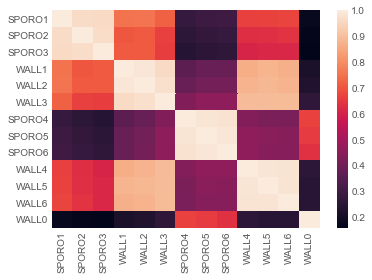

In [29]:
temp = np.log10(selection.replace(0,np.nan).dropna())
for n in temp.columns:
    ccc= PTUT.concordance_correlation_coefficient(temp['WALL0'].values, temp[n].values)
    print(n,ccc)
sns.heatmap(np.log10(selection.replace(0,np.nan).dropna()).corr(PTUT.concordance_correlation_coefficient))

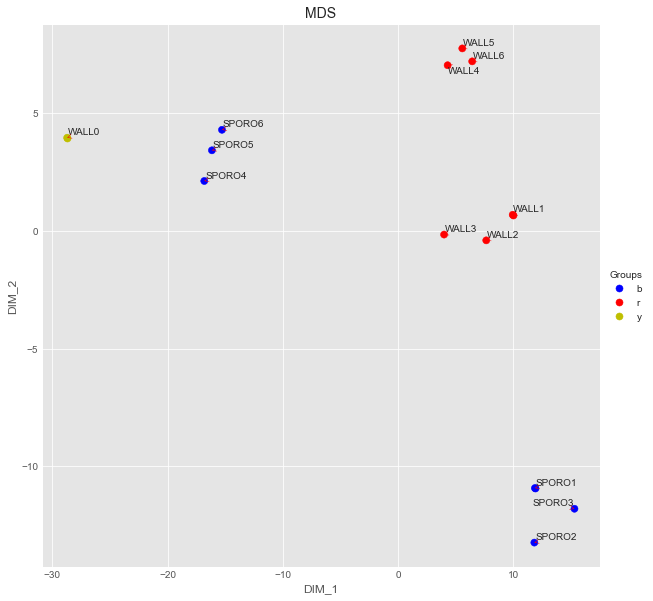

In [30]:
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(10,10))
PTUT.make_mds(np.log10(selection.replace(0,np.nan).dropna()),
              palette=palette,ax=ax,do_adjust_text=True)
plt.show()

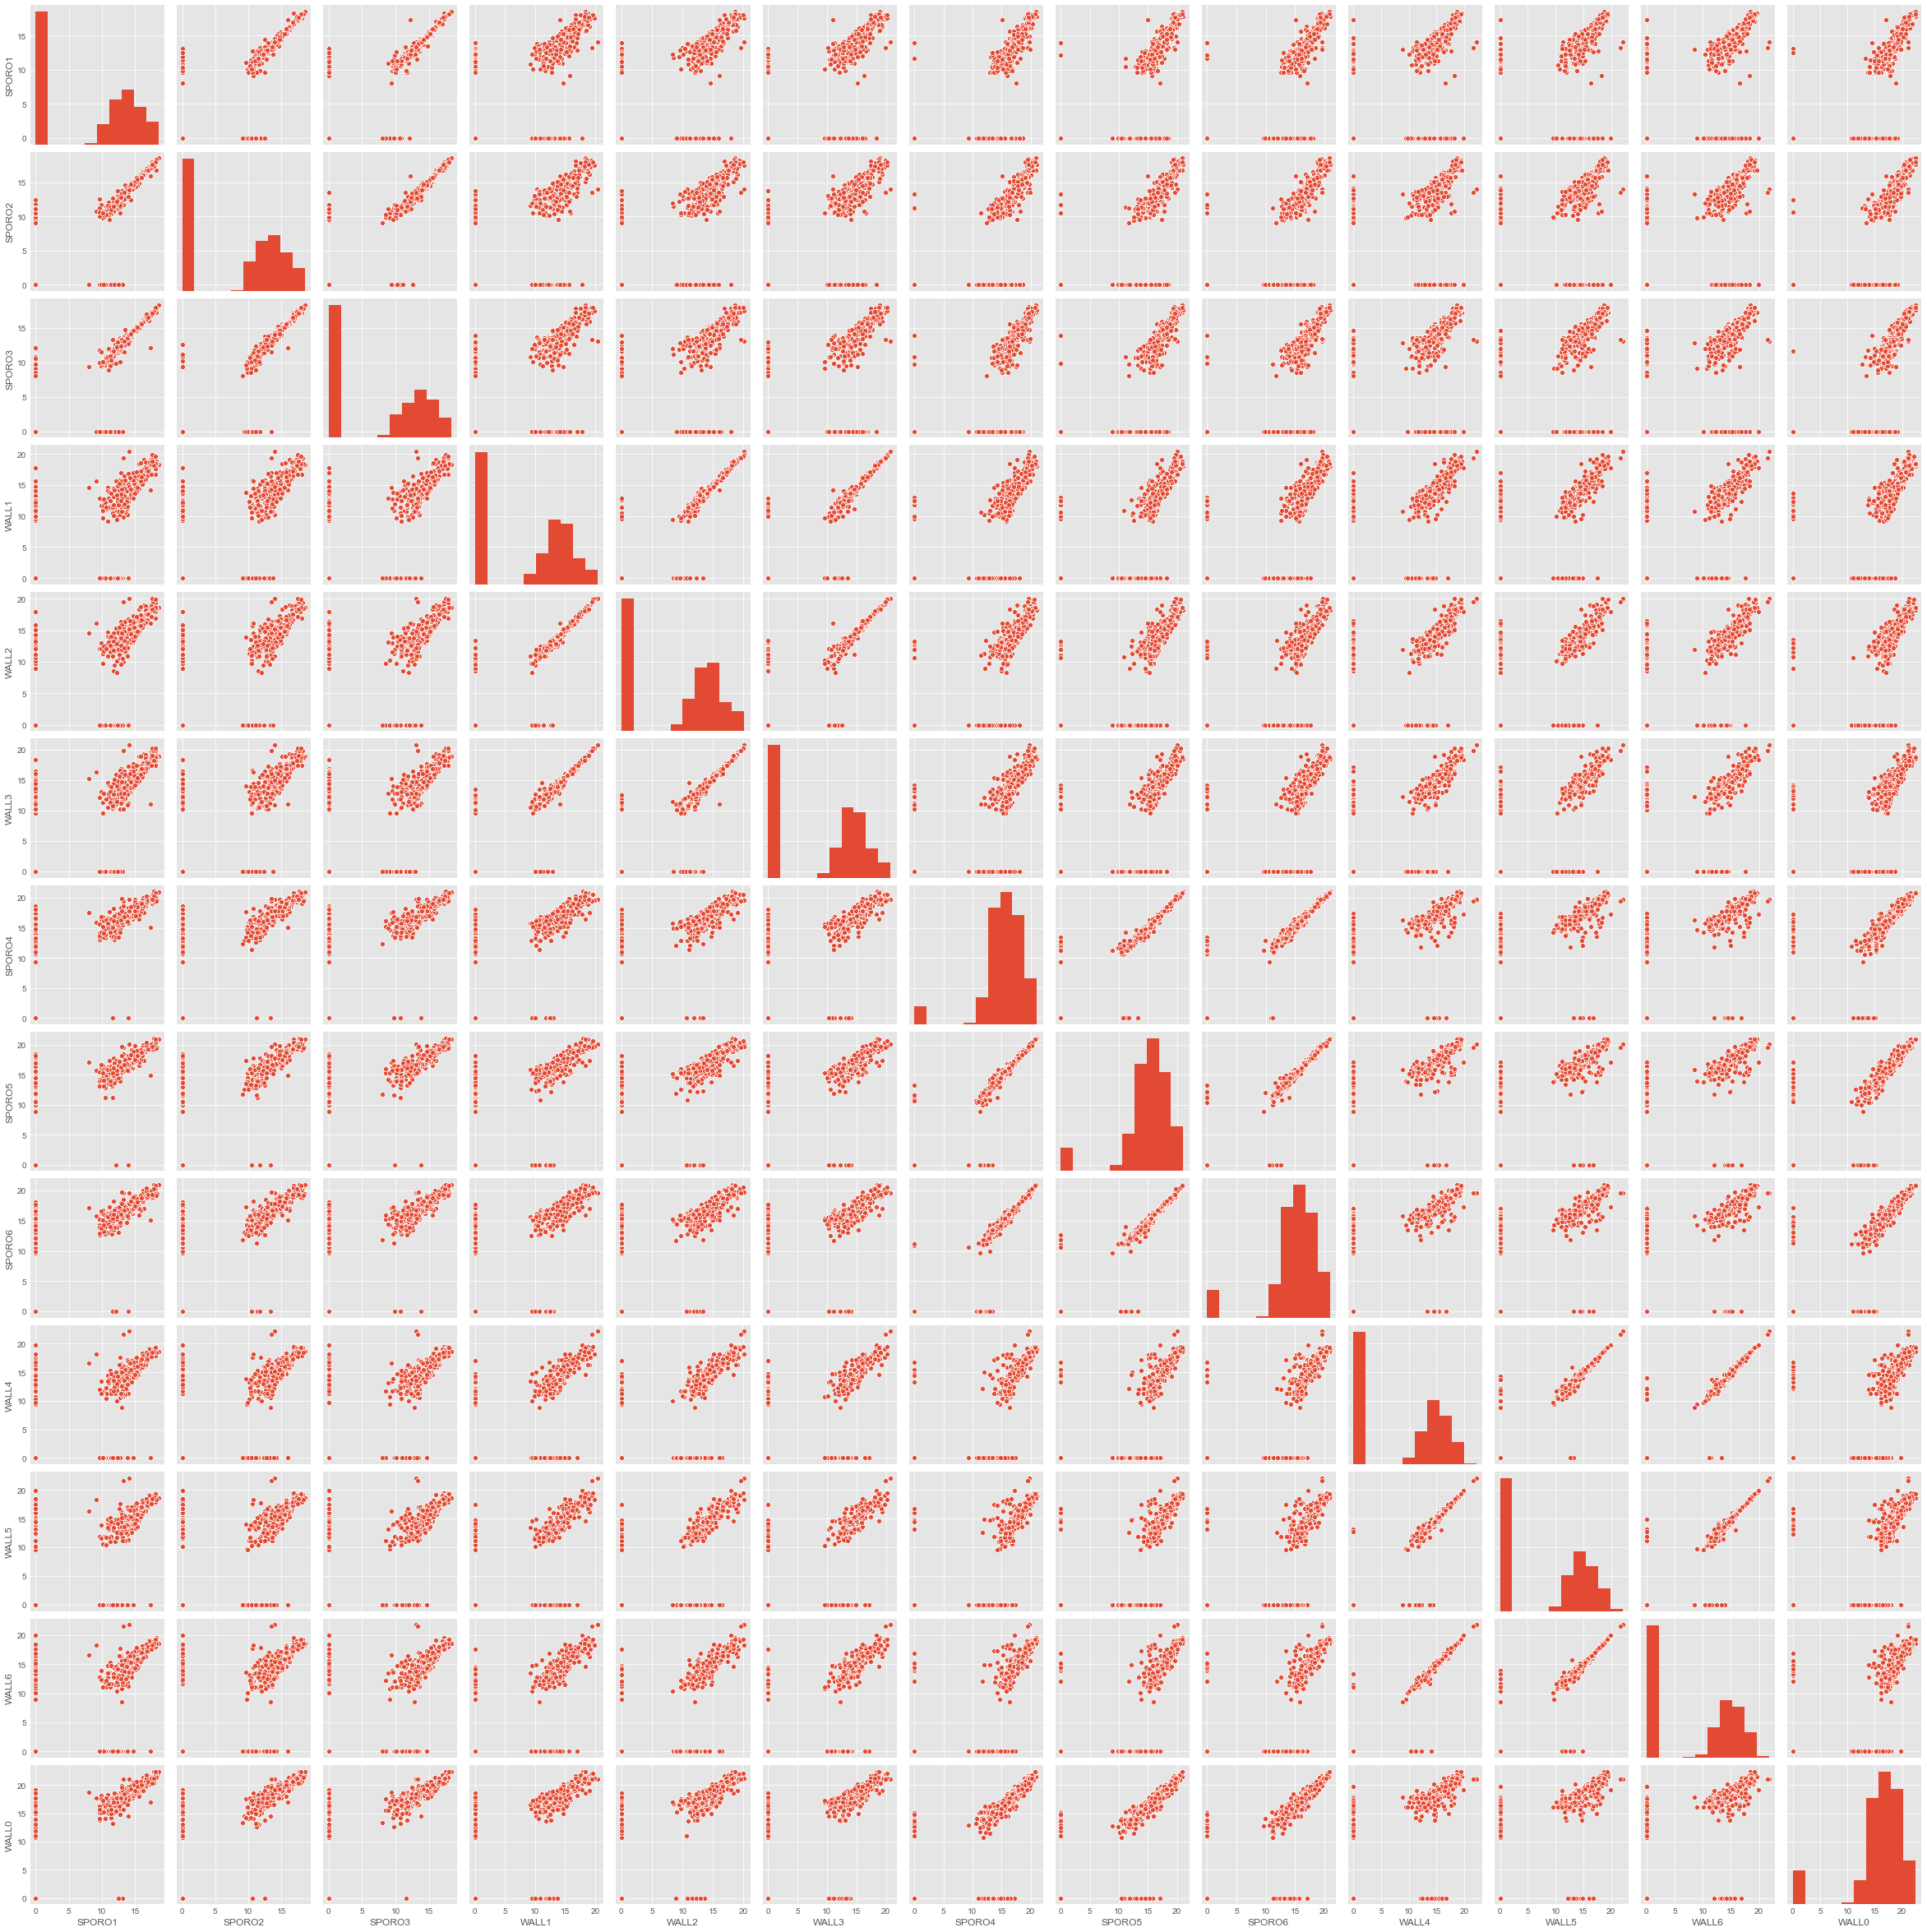

In [31]:
g = sns.pairplot(np.log1p(selection).dropna().sample(500))
#plt.savefig(os.path.join(TXT_PATH,'corr_pairplot.png'))
plt.show()

### Coefficent of variation

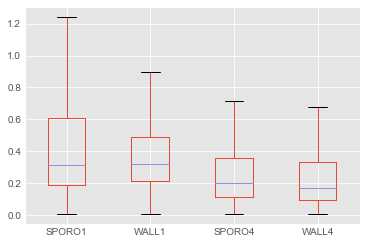

In [32]:
def get_cv(data):
    mean = data.mean(axis=1)
    #print(mean)
    std = data.std(axis=1)
    #print(std)
    cv = std/mean
    #print(cv)
    return cv

cvs = []
for group in [
    ['SPORO1', 'SPORO2', 'SPORO3'],
    ['WALL1', 'WALL2', 'WALL3'],
    ['SPORO4', 'SPORO5', 'SPORO6'],
    ['WALL4', 'WALL5', 'WALL6']]:
    
    data = selection[group]
    cvs.append(get_cv(data))
    
    
cvs = pd.concat(cvs,axis=1)
cvs.columns = ['SPORO1','WALL1','SPORO4','WALL4']
cvs.plot(kind='box',showfliers=False)

## Visualise Wall Markers

In [33]:
controls = ['cgd6_2090-RA-p1', 'cgd6_200-RA-p1', 'cgd4_3090-RA-p1']

In [34]:
#tag ='Intensity'
#tag ='iBAQ'
#tag ='LFQ intensity'
def plot_prot(gene,log=True,tag='LFQ intensity'):
    cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL1', ' WALL2',' WALL3',
         ' SPORO4',' SPORO5',' SPORO6', ' WALL4', ' WALL5',' WALL6',
         ' WALL0',]
    cols = [tag+n for n in cols]
    temp = df[df['Fasta headers'].str.contains(gene)][cols]
    temp.columns = [n.split(' ')[-1] for  n in temp.columns]
    if log:
        temp=np.log10(temp)
    fig,ax=plt.subplots(figsize=(12,4))
    sns.barplot(data=temp,palette=palette,ax=ax)#.plot(kind='bar',color=palette)
    plt.ylabel(tag)
    plt.title(gene +' '+desc_dict[gene])
    plt.show()
    #print(desc_dict[gene])
    #print(temp_PolySTest.loc[gene][['log2fc','log10meanInt']])


In [36]:
desc_dict = dict(zip(df['Gene_id'], df['desc']))

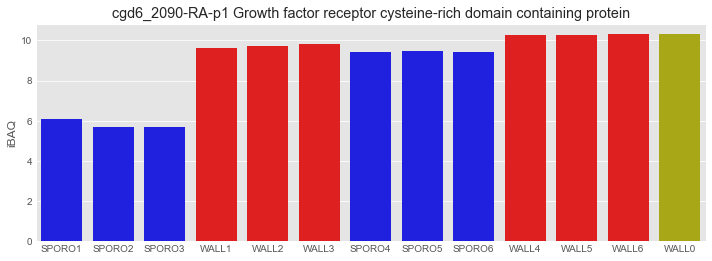

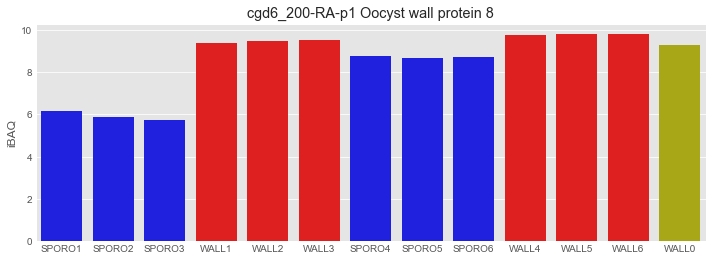

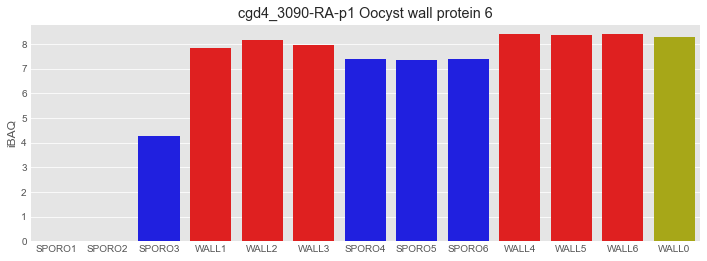

In [37]:
for prot in controls:
    plot_prot(prot, log=True, tag='iBAQ')

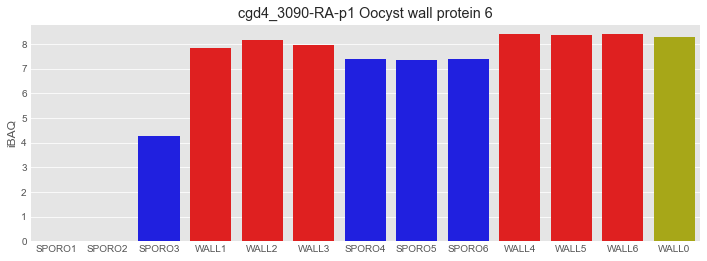

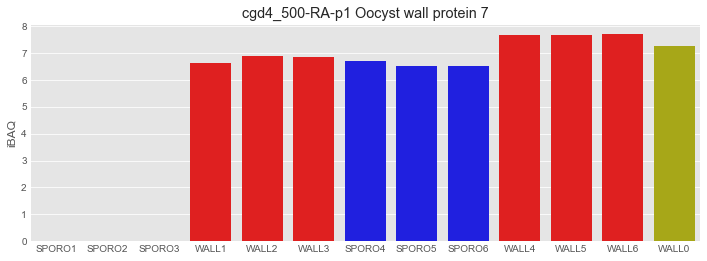

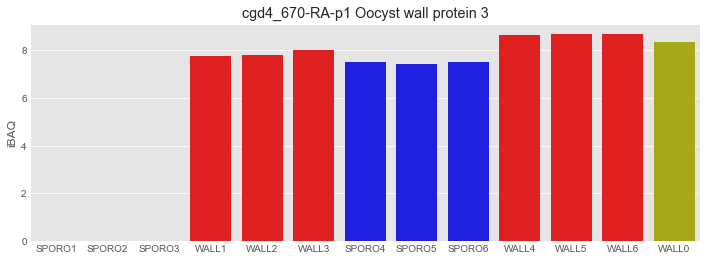

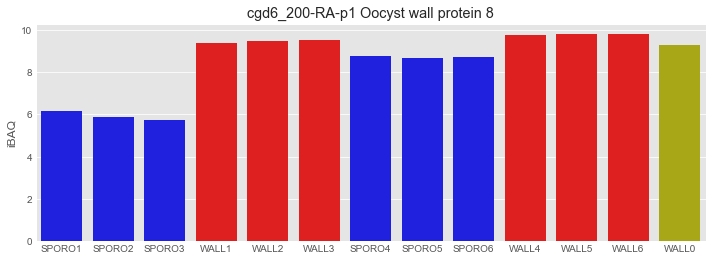

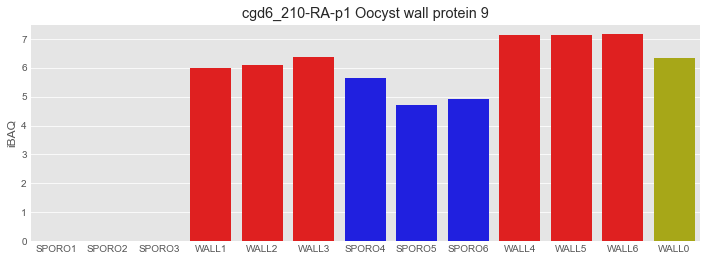

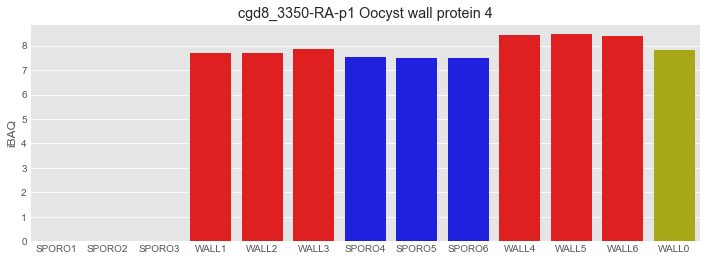

In [38]:
for prot in literature_wall.join(df[['Protein IDs','desc']])['Protein IDs'].values:
    plot_prot(prot, log=True, tag='iBAQ')
    

## ProtRank

In [39]:
selection

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6,WALL0
0,214910.0,166560.0,160680.0,13081.0,4231.5,94181.0,7144700.0,3945800.0,4291100.0,21458.0,0.0,31040.0,24902000.0
1,1195200.0,1041000.0,883470.0,627210.0,389880.0,660910.0,9195500.0,13542000.0,11965000.0,0.0,0.0,0.0,64449000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1426800.0,1171300.0,704480.0,0.0,0.0,0.0,2416700.0
3,84054.0,74441.0,60493.0,254440.0,242530.0,741450.0,2754600.0,1358700.0,901730.0,0.0,0.0,0.0,3254700.0
4,153660.0,352370.0,216700.0,1214500.0,1254300.0,1097400.0,12736000.0,6227800.0,5450100.0,440860.0,393670.0,442900.0,35202000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,3541400.0,4633200.0,4732000.0,2401100.0,3439200.0,3268100.0,56405000.0,49281000.0,49152000.0,5014700.0,3969100.0,3279100.0,251230000.0
1920,1114100.0,1331000.0,719220.0,380050.0,568840.0,667260.0,20667000.0,15024000.0,15901000.0,738550.0,595600.0,1238700.0,80048000.0
1921,0.0,0.0,0.0,0.0,0.0,0.0,2287200.0,1022500.0,1071400.0,0.0,0.0,0.0,3606400.0
1922,0.0,0.0,0.0,0.0,0.0,0.0,902020.0,449590.0,880050.0,0.0,0.0,0.0,5956000.0


In [40]:
indata_prank = selection.copy()
del indata_prank['WALL0']
indata_prank.head()

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6
0,214910.0,166560.0,160680.0,13081.0,4231.5,94181.0,7144700.0,3945800.0,4291100.0,21458.0,0.0,31040.0
1,1195200.0,1041000.0,883470.0,627210.0,389880.0,660910.0,9195500.0,13542000.0,11965000.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1426800.0,1171300.0,704480.0,0.0,0.0,0.0
3,84054.0,74441.0,60493.0,254440.0,242530.0,741450.0,2754600.0,1358700.0,901730.0,0.0,0.0,0.0
4,153660.0,352370.0,216700.0,1214500.0,1254300.0,1097400.0,12736000.0,6227800.0,5450100.0,440860.0,393670.0,442900.0


In [41]:
## replace prot

In [42]:
#indata_prank = selection[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
#indata_prank=indata_prank.replace(0,np.nan)
#indata_prank=indata_prank.fillna(indata_prank.min())
indata_prank=indata_prank.join(df[['Gene_id']],how='left')
indata_prank.set_index('Gene_id',drop=True,inplace=True)
indata_prank.to_csv('../indata_ProtRank.csv')
indata_prank.head()

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3,SPORO4,SPORO5,SPORO6,WALL4,WALL5,WALL6
Gene_id,,,,,,,,,,,,
cgd1_1060-RA-p1,214910.0,166560.0,160680.0,13081.0,4231.5,94181.0,7144700.0,3945800.0,4291100.0,21458.0,0.0,31040.0
cgd1_1080-RA-p1,1195200.0,1041000.0,883470.0,627210.0,389880.0,660910.0,9195500.0,13542000.0,11965000.0,0.0,0.0,0.0
cgd1_110-RA-p1,0.0,0.0,0.0,0.0,0.0,0.0,1426800.0,1171300.0,704480.0,0.0,0.0,0.0
cgd1_1110-RA-p1,84054.0,74441.0,60493.0,254440.0,242530.0,741450.0,2754600.0,1358700.0,901730.0,0.0,0.0,0.0
cgd1_1140-RA-p1,153660.0,352370.0,216700.0,1214500.0,1254300.0,1097400.0,12736000.0,6227800.0,5450100.0,440860.0,393670.0,442900.0


In [43]:
what_to_compare = [[ 
    ['WALL1',  'SPORO1'], ['WALL2', 'SPORO2'], ['WALL3', 'SPORO3'],
    ['WALL4',  'SPORO4'], ['WALL5', 'SPORO5'], ['WALL6', 'SPORO6'] 
                   ]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SPORO_vs_WALL'
significant_proteins = ProtRank.rank_proteins(indata_prank, what_to_compare, description, path_to='../')


input data contain results for 1733 proteins and 12 different conditions
list of measured conditions: SPORO1, SPORO2, SPORO3, WALL1, WALL2, WALL3, SPORO4, SPORO5, SPORO6, WALL4, WALL5, WALL6
in the data, 33.4% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
12 comparisons provided: [[['WALL1', 'SPORO1'], ['WALL2', 'SPORO2'], ['WALL3', 'SPORO3'], ['WALL4', 'SPORO4'], ['WALL5', 'SPORO5'], ['WALL6', 'SPORO6']]]
after ignoring 13 rows with only zero counts, 1720 rows remain
in the analyzed data, 32.9% of all counts are zeros
median count is 2.33e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 8.96e+06
ratio between the 90th and the 10th percentile non-zero count is 7.68e+02
statistics of irregular missing values:
  in total, there are 3556 comparisons involving a zero and a non-zero value (34.5% of all)
  out of 10320 comparisons, 847 involve a zero value and a non-zero e

In [44]:
what_to_compare = [[ 
    ['WALL1',  'SPORO1'], ['WALL2', 'SPORO2'], ['WALL3', 'SPORO3'],
    
                   ]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SPORO_vs_WALL_1'
significant_proteins = ProtRank.rank_proteins(indata_prank, what_to_compare, description, path_to='../')


input data contain results for 1733 proteins and 12 different conditions
list of measured conditions: SPORO1, SPORO2, SPORO3, WALL1, WALL2, WALL3, SPORO4, SPORO5, SPORO6, WALL4, WALL5, WALL6
in the data, 33.4% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['WALL1', 'SPORO1'], ['WALL2', 'SPORO2'], ['WALL3', 'SPORO3']]]
after ignoring 432 rows with only zero counts, 1301 rows remain
in the analyzed data, 21.9% of all counts are zeros
median count is 9.28e+05 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 2.84e+06
ratio between the 90th and the 10th percentile non-zero count is 7.38e+02
statistics of irregular missing values:
  in total, there are 1181 comparisons involving a zero and a non-zero value (30.3% of all)
  out of 3903 comparisons, 206 involve a zero value and a non-zero exceeding 1.0 * median (5.3% of all)
  (the smaller the fraction,

In [45]:
what_to_compare = [[ 
    
    ['WALL4',  'SPORO4'], ['WALL5', 'SPORO5'], ['WALL6', 'SPORO6'] 
                   ]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SPORO_vs_WALL_2'
significant_proteins = ProtRank.rank_proteins(indata_prank, what_to_compare, description, path_to='../')


input data contain results for 1733 proteins and 12 different conditions
list of measured conditions: SPORO1, SPORO2, SPORO3, WALL1, WALL2, WALL3, SPORO4, SPORO5, SPORO6, WALL4, WALL5, WALL6
in the data, 33.4% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['WALL4', 'SPORO4'], ['WALL5', 'SPORO5'], ['WALL6', 'SPORO6']]]
after ignoring 16 rows with only zero counts, 1717 rows remain
in the analyzed data, 24.7% of all counts are zeros
median count is 4.73e+06 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 3.77e+06
ratio between the 90th and the 10th percentile non-zero count is 5.36e+02
statistics of irregular missing values:
  in total, there are 2375 comparisons involving a zero and a non-zero value (46.1% of all)
  out of 5151 comparisons, 365 involve a zero value and a non-zero exceeding 1.0 * median (7.1% of all)
  (the smaller the fraction, 

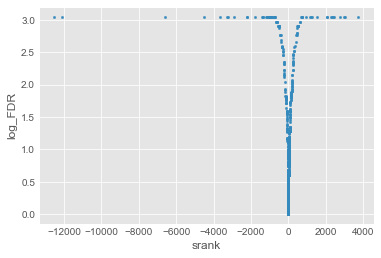

In [46]:
def parse_prank(fname='../prs-SPORO_vs_WALL.dat'):
    temp_1 = pd.read_csv(os.path.join(fname),
                       sep='\t', comment='#', index_col=[1],
                       names=['id','rank','FDR','sign'])
    temp_1['log_FDR']=-np.log10(temp_1['FDR']+0.0009)
    temp_1['log_rank']=np.log10(temp_1['rank'])
    temp_1['srank']=[n*1 if a=='+' else n*-1 for n,a in zip(temp_1['rank'],temp_1['sign'])]
    temp_1['desc']=[desc_dict[n] for n in temp_1.index.values]
    temp_1.plot(kind='scatter',x='srank',y='log_FDR',marker='.')
    #print(fname+'prank_outo.csv')
    temp_1.to_csv(fname+'prank_out.csv')
    return temp_1

out_all = parse_prank()    

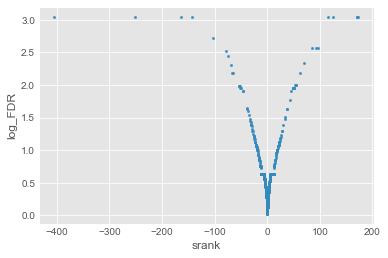

In [47]:
out_1 = parse_prank('../prs-SPORO_vs_WALL_1.dat')  

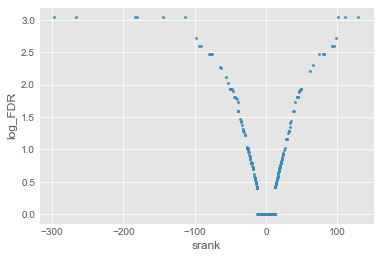

In [48]:
out_2 = parse_prank('../prs-SPORO_vs_WALL_2.dat')  

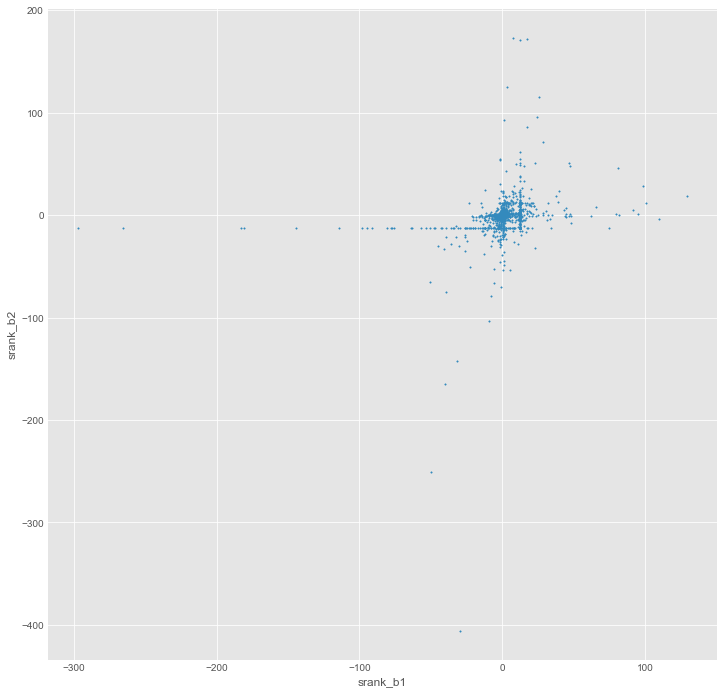

In [49]:
out_all.join(out_2,rsuffix='_b1').join(out_1,rsuffix='_b2').plot(
    kind='scatter',x='srank_b1',y='srank_b2',figsize=(12,12),s=2)

In [50]:
from upsetplot import plot

In [54]:
def upset_data():
    table_dict = {}
    oocyst_all = out_all[(out_all['FDR']<0.1) & (out_all['sign']=='-')]
    sporo_all = out_all[(out_all['FDR']<0.1) & (out_all['sign']=='+')]

    oocyst_1 = out_1[(out_1['FDR']<0.1) & (out_1['sign']=='-')]
    sporo_1 = out_1[(out_1['FDR']<0.1) & (out_1['sign']=='+')]

    oocyst_2 = out_2[(out_2['FDR']<0.1) & (out_2['sign']=='-')]
    sporo_2 = out_2[(out_2['FDR']<0.1) & (out_2['sign']=='+')]

    table_dict['oocyst_all']=oocyst_all.index.values
    table_dict['sporo_all']=sporo_all.index.values

    table_dict['oocyst_1']=oocyst_1.index.values
    table_dict['sporo_1']=sporo_1.index.values

    table_dict['oocyst_2']=oocyst_2.index.values
    table_dict['sporo_2']=sporo_2.index.values
    return table_dict

table_dict = upset_data()

In [55]:
#table_dict

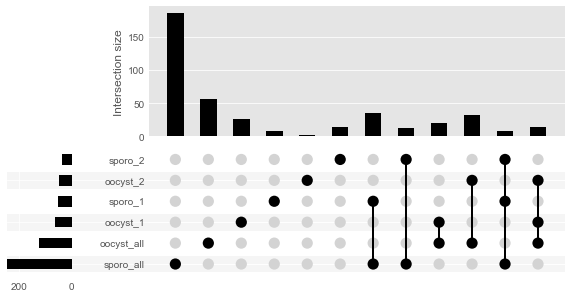

In [56]:
from upsetplot import plot,UpSet
from upsetplot import from_contents
import matplotlib
data_upset = from_contents(table_dict)
plot(data_upset)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

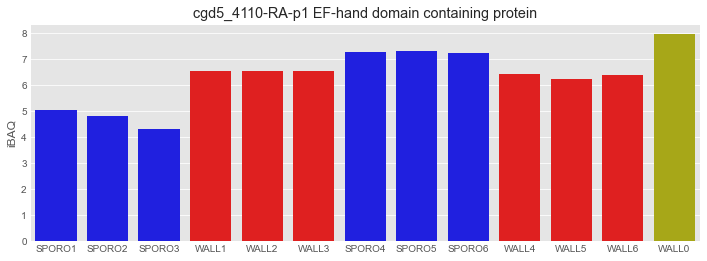

In [57]:
plot_prot('cgd5_4110-RA-p1', log=True, tag='iBAQ')

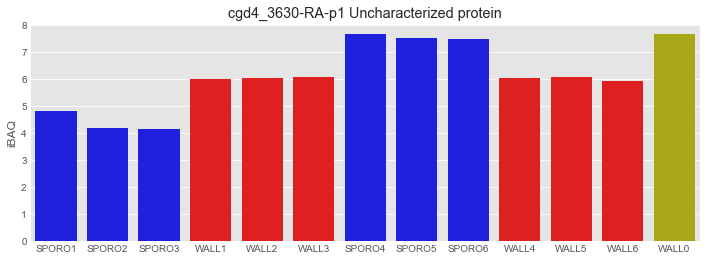

In [58]:
plot_prot('cgd4_3630-RA-p1', log=True, tag='iBAQ')

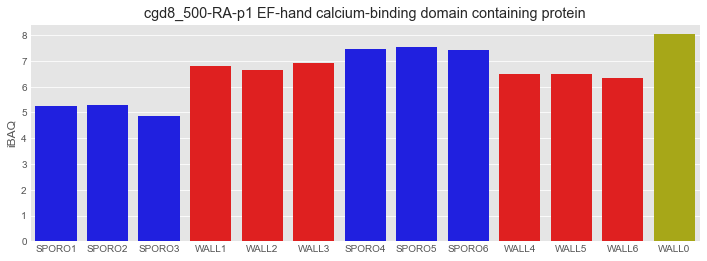

In [59]:
plot_prot('cgd8_500-RA-p1', log=True, tag='iBAQ')

In [61]:
#unique to one
selection = []
for n in table_dict['oocyst_1']:
    if n not in table_dict['oocyst_2']:
        if n not in table_dict['oocyst_all']:
            selection.append(n)
out_all.loc[selection]

,id,rank,FDR,sign,log_FDR,log_rank,srank,desc
cgd5_4110-RA-p1,378,33.627277,0.10286,-,0.983970,1.526692,-33.627277,EF-hand domain containing protein
cgd4_3630-RA-p1,1439,0.314213,0.71365,-,0.145967,-0.502776,-0.314213,Uncharacterized protein
cgd8_500-RA-p1,530,12.774099,0.23802,-,0.621747,1.106330,-12.774099,EF-hand calcium-binding domain containing protein
cgd3_1940-RA-p1,1050,3.956444,0.29904,-,0.522966,0.597305,-3.956444,Translationally controlled tumour protein asso...
cgd5_3450-RA-p1,1091,2.965648,0.34211,-,0.464693,0.472120,-2.965648,Nascent polypeptide-associated complex subunit...
cgd6_2210-RA-p1,523,13.639824,0.22649,-,0.643229,1.134809,-13.639824,Uncharacterized transmembrane Protein
cgd3_1730-RA-p1,1106,2.632088,0.36494,-,0.436709,0.420300,-2.632088,Uncharacterized protein
cgd4_210-RA-p1,1720,0.006354,1.00000,-,-0.000391,-2.196925,-0.006354,Ubiquitin-conjugating enzyme E2
cgd2_130-RA-p1,468,23.748810,0.13853,-,0.855644,1.375642,-23.748810,60S acidic ribosomal protein LP2
cgd3_550-RA-p1,1629,0.037166,1.00000,-,-0.000391,-1.429854,-0.037166,Major Facilitator Superfamily


In [62]:
#unique to two
selection = []
for n in table_dict['oocyst_2']:
    if n not in table_dict['oocyst_1']:
        if n not in table_dict['oocyst_all']:
            selection.append(n)
out_all.loc[selection]

,id,rank,FDR,sign,log_FDR,log_rank,srank,desc
cgd8_4140-RA-p1,457,26.520075,0.13258,-,0.874584,1.423575,-26.520075,ELM2 domain-containing protein
cgd1_890-RA-p1,461,25.248170,0.13258,-,0.874584,1.402230,-25.248170,Protein kinase domain containing protein


In [63]:
selection_ids = set(controls + list(literature_wall.join(df[['Protein IDs','desc']])['Protein IDs'].values))
selection_ids

{'cgd4_3090-RA-p1',
 'cgd4_500-RA-p1',
 'cgd4_670-RA-p1',
 'cgd6_200-RA-p1',
 'cgd6_2090-RA-p1',
 'cgd6_210-RA-p1',
 'cgd8_3350-RA-p1'}

In [67]:
#viz.loc[annot.index.values]

no selection


No handles with labels found to put in legend.


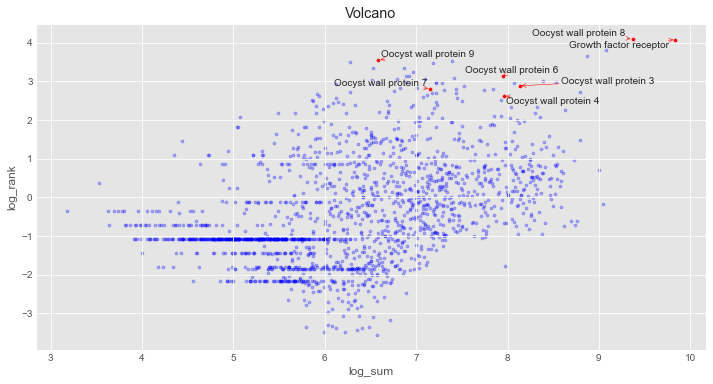

In [69]:
#print(df.shape,out_all.shape,)
viz = out_all.join(df.set_index('Gene_id')[cols[0:-1]],how='inner')
annot = viz.loc[selection_ids]
#print(df.shape,out_all.shape,viz.shape)
#viz=viz.drop_duplicates('id')
#print(df.shape,out_all.shape,viz.shape)
viz['log_sum']=np.log10(viz[cols[0:-1]].mean(axis=1))
viz['log_rank'] = [np.log10(n[0]) if n[1]=='-' else np.log10(n[0])*-1 for n in zip(viz['rank'],viz['sign'])]
fig,ax=plt.subplots(figsize=(12,6))


PTUT.make_vulcano(df=viz,
                  ax=ax,
                  y='log_rank',
                  x='log_sum',
                  fc_col = 'log_rank',
                  point_size_selection=10,
                  point_size_all=10,
                  annot_index=annot.index.values,
                  annot_names=[n[0:23] for n in annot.desc.values],
                  alpha_main=0.3
             
)

no selection


No handles with labels found to put in legend.


(0.2, -0.1)

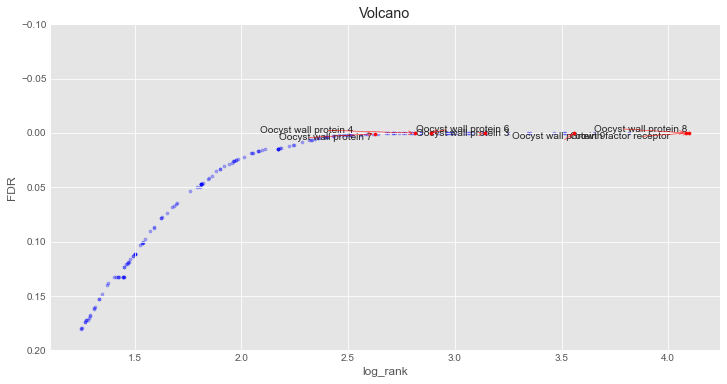

In [91]:
#print(df.shape,out_all.shape,)
#viz = out_all.join(df.set_index('Gene_id')[cols[0:-1]],how='inner')
#annot = viz.loc[selection_ids]
#print(df.shape,out_all.shape,viz.shape)
#viz=viz.drop_duplicates('id')
#print(df.shape,out_all.shape,viz.shape)
viz['log_sum']=np.log10(viz[cols[0:-1]].mean(axis=1))
viz['log_rank'] = [np.log10(n[0]) if n[1]=='-' else np.log10(n[0])*-1 for n in zip(viz['rank'],viz['sign'])]
fig,ax=plt.subplots(figsize=(12,6))

viz['FDR2'] = -viz['FDR']
temp = viz.copy()
temp = temp[temp['FDR2']>-0.2]
temp = temp[temp['srank']<0]
PTUT.make_vulcano(df=temp,
                  ax=ax,
                  y='FDR',
                  x='log_rank',
                  fc_col = 'srank',
                  point_size_selection=10,
                  point_size_all=10,
                  annot_index=annot.index.values,
                  annot_names=[n[0:23] for n in annot.desc.values],
                  alpha_main=0.3
             
)
plt.ylim(0.2,-0.1)

In [95]:
viz.sort_values('srank')[['srank','FDR','desc']].head(50)

,srank,FDR,desc
cgd6_200-RA-p1,-12541.852037,0.00000,Oocyst wall protein 8
cgd6_2090-RA-p1,-12091.149570,0.00000,Growth factor receptor cysteine-rich domain co...
cgd2_490-RA-p1,-6573.067891,0.00000,Uncharacterized protein
cgd3_190-RA-p1,-4506.040900,0.00000,Fibrillin/EGF-like calcium-binding conserved s...
cgd6_210-RA-p1,-3629.733883,0.00000,Oocyst wall protein 9
cgd7_850-RA-p1,-3296.277343,0.00000,Patched family protein/Sterol-sensing domain-c...
cgd2_2510-RA-p1,-3243.654672,0.00000,Glucose-methanol-choline oxidoreductase
cgd6_2470-RA-p1,-2927.689021,0.00000,Sulfhydryl oxidase
cgd7_1800-RA-p1,-2237.416584,0.00000,Chitin-binding type-2 domain containing protein
cgd6_4640-RA-p1,-2205.586855,0.00000,Uncharacterized protein


In [96]:
!jupyter nbconvert --to html_toc analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html_toc
[NbConvertApp] Support files will be in analysis_files/
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory anal

In [86]:
#viz